In [1]:
import hoomd
import hoomd.md

In [2]:
hoomd.context.initialize("");

HOOMD-blue 2.3.0 DOUBLE HPMC_MIXED SSE SSE2 SSE3 
Compiled: 04/25/18
Copyright 2009-2018 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU


In [3]:
snapshot = hoomd.data.make_snapshot(N=10,
                                   box=hoomd.data.boxdim(Lx=10, Ly=0.5, Lz=0.5),
                                   particle_types=['A','B'],
                                   bond_types=['polymer']);

In [4]:
snapshot.particles.position[:] = [[-4.5,0,0], [-3.5,0,0],
                                 [-2.5,0,0], [-1.5,0,0],
                                 [-0.5,0,0], [0.5,0,0],
                                 [1.5,0,0], [2.5,0,0],
                                 [3.5,0,0], [4.5,0,0]];

In [5]:
snapshot.particles.typeid[0:7]=0;
snapshot.particles.typeid[7:10]=1;

In [6]:
snapshot.bonds.resize(9);
snapshot.bonds.group[:] = [[0,1], [1,2], [2,3],
                          [3,4], [4,5], [5,6],
                          [6,7], [7,8], [8,9]];

In [7]:
snapshot.replicate(1,20,20);

In [8]:
import numpy
snapshot.particles.velocity[:] = numpy.random.normal(0.0, numpy.sqrt(0.8 / 1.0), [snapshot.particles.N, 3]);

In [9]:
hoomd.init.read_snapshot(snapshot);

notice(2): Group "all" created containing 4000 particles


In [10]:
n1 = hoomd.md.nlist.cell();

In [11]:
dpd = hoomd.md.pair.dpd(r_cut=1.0, nlist=n1, kT=0.8, seed=1);

-----
You are using DPD. Please cite the following:
* C L Phillips, J A Anderson, and S C Glotzer. "Pseudo-random number generation
  for Brownian Dynamics and Dissipative Particle Dynamics simulations on GPU
  devices", Journal of Computational Physics 230 (2011) 7191--7201
-----


In [12]:
dpd.pair_coeff.set('A', 'A', A=25.0, gamma = 1.0);
dpd.pair_coeff.set('A', 'B', A=100.0, gamma = 1.0);
dpd.pair_coeff.set('B', 'B', A=25.0, gamma = 1.0);

In [13]:
n1.reset_exclusions(exclusions = []);

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 4000
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no


In [14]:
harmonic = hoomd.md.bond.harmonic();

In [15]:
harmonic.bond_coeff.set('polymer', k=100.0, r0=0);

In [16]:
hoomd.md.integrate.mode_standard(dt=0.01);

In [17]:
all = hoomd.group.all();
hoomd.md.integrate.nve(group=all);

In [18]:
hoomd.analyze.log(filename="log-output2.log",
                 quantities=['potential_energy', 'temperature'],
                 period = 500,
                 overwrite=True);

In [19]:
hoomd.dump.gsd("trajectory2.gsd", period = 10e3, group=all, overwrite = True);

In [20]:
hoomd.run(5e4);

** starting run **
Time 00:00:10 | Step 801 / 50000 | TPS 80.0135 | ETA 00:10:14
Time 00:00:20 | Step 2212 / 50000 | TPS 140.934 | ETA 00:05:39
Time 00:00:30 | Step 3725 / 50000 | TPS 151.09 | ETA 00:05:06
Time 00:00:40 | Step 5229 / 50000 | TPS 150.367 | ETA 00:04:57
Time 00:00:50 | Step 6728 / 50000 | TPS 149.848 | ETA 00:04:48
Time 00:01:00 | Step 8237 / 50000 | TPS 150.887 | ETA 00:04:36
Time 00:01:10 | Step 9759 / 50000 | TPS 152.181 | ETA 00:04:24
Time 00:01:20 | Step 11256 / 50000 | TPS 149.584 | ETA 00:04:19
Time 00:01:30 | Step 12750 / 50000 | TPS 149.162 | ETA 00:04:09
Time 00:01:40 | Step 14186 / 50000 | TPS 143.561 | ETA 00:04:09
Time 00:01:50 | Step 15546 / 50000 | TPS 135.934 | ETA 00:04:13
Time 00:02:00 | Step 16977 / 50000 | TPS 143.094 | ETA 00:03:50
Time 00:02:10 | Step 18441 / 50000 | TPS 146.335 | ETA 00:03:35
Time 00:02:20 | Step 19893 / 50000 | TPS 144.96 | ETA 00:03:27
Time 00:02:30 | Step 21312 / 50000 | TPS 141.838 | ETA 00:03:22
Time 00:02:40 | Step 22631 / 50

In [21]:
import numpy
from matplotlib import pyplot
%matplotlib inline
data = numpy.genfromtxt(fname='log-output2.log', skip_header=True);

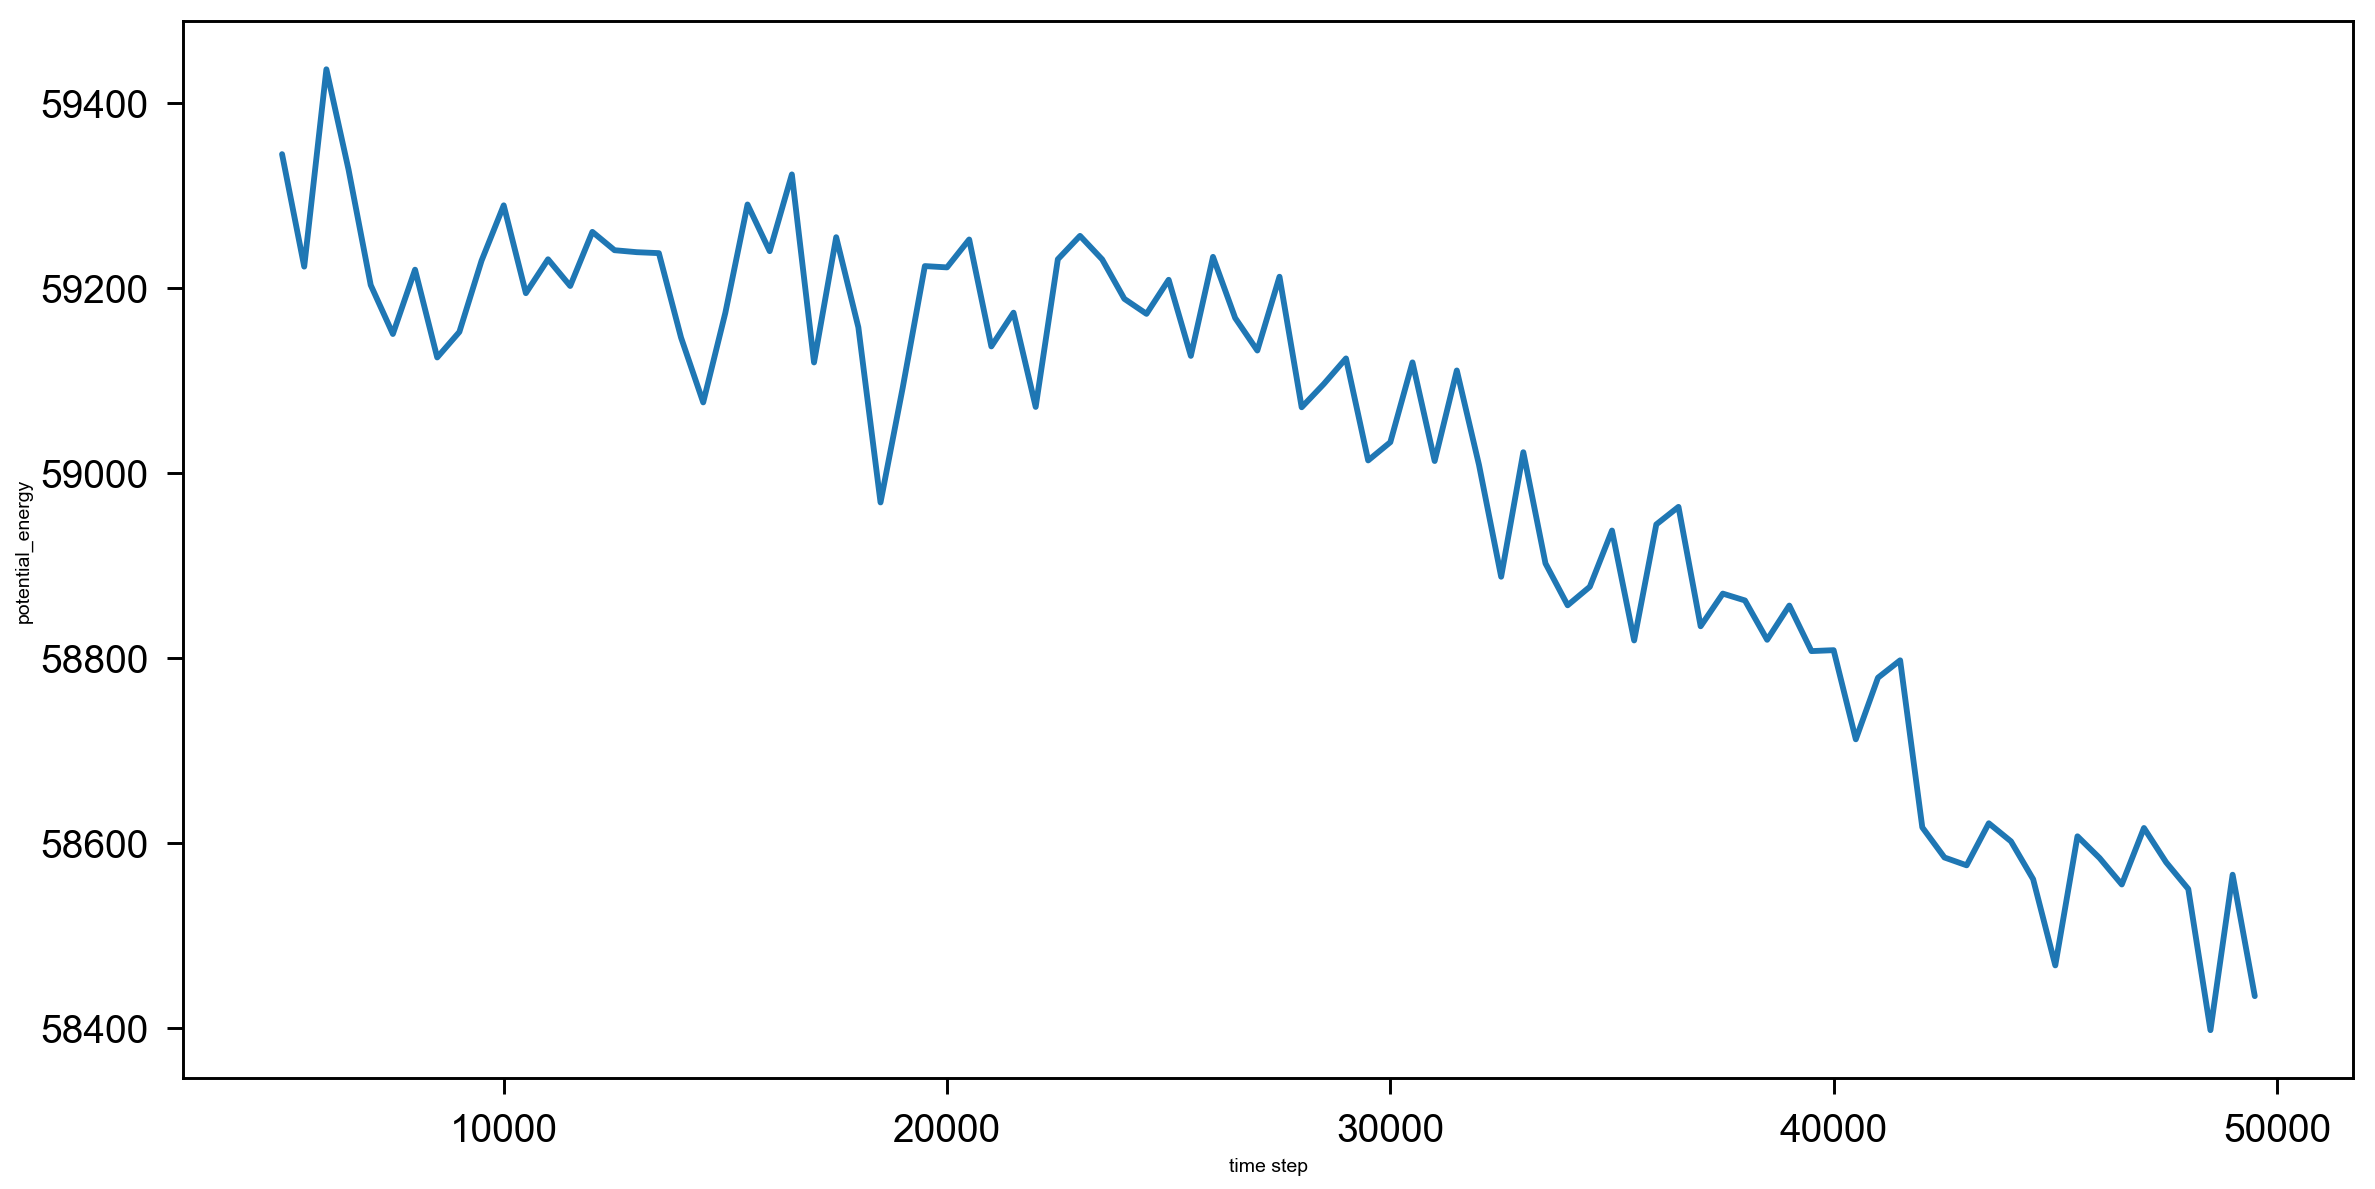

In [28]:
pyplot.figure(figsize=(20,10), dpi=140);
pyplot.plot(data[10:,0], data[10:,1]);
pyplot.xlabel('time step');
pyplot.ylabel('potential_energy');

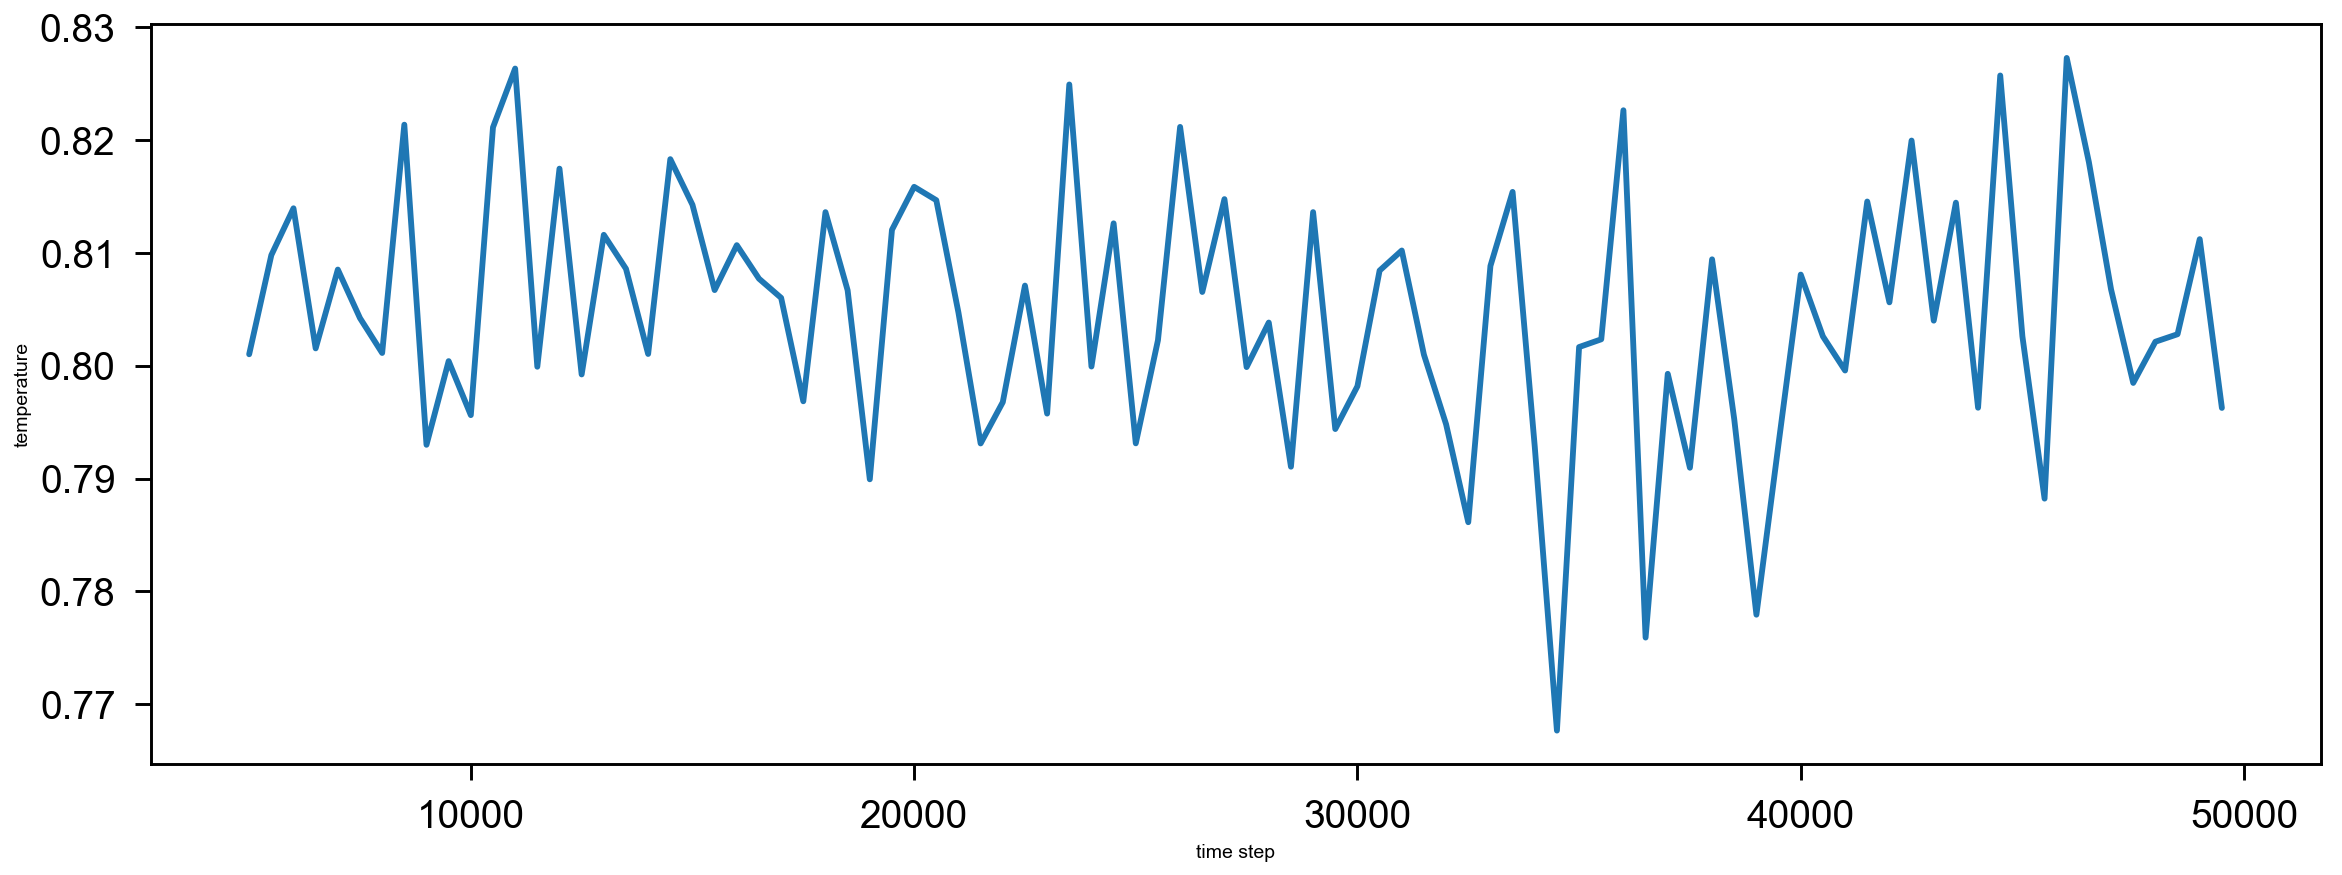

In [31]:
pyplot.figure(figsize=(20,7), dpi=140);
pyplot.plot(data[10:,0], data[10:,2]);
pyplot.xlabel('time step');
pyplot.ylabel('temperature');